In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


# Part 1 - Exploratory Data Analysis

In [2]:
logins = pd.read_json('logins.json')
logins = logins.set_index('login_time')

In [3]:
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [4]:
logins.shape

(93142, 0)

In [5]:
day_dict = {0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
logins['visit']= 1
login_count = logins.resample('15T').count()

**One Day Plot** 

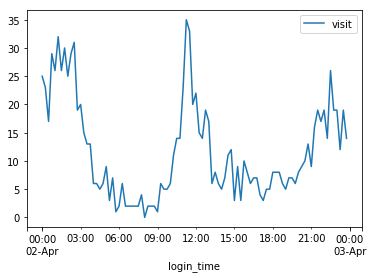

In [6]:
login_count['1970-04-02'].plot()
plt.show()

**One Week Plot**

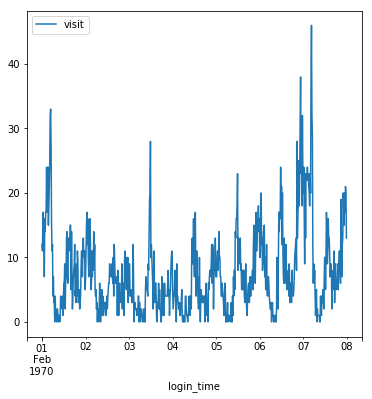

In [7]:
login_count['1970-02-01':'1970-02-07'].plot(figsize=(6, 6))
plt.show()

We notice an increased traffic couple of days in the week. Probably a weekend? 

**Average Daily Plot**

In [8]:
daily_count = logins.resample('D').count()
daily_count['day'] = daily_count.index.weekday

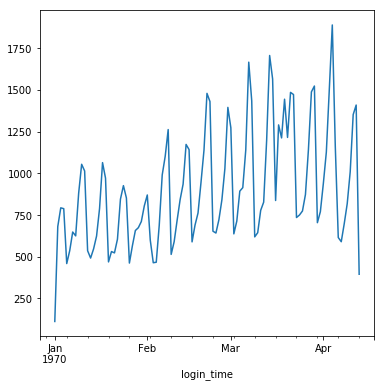

In [9]:
daily_count['visit'].plot(figsize=(6, 6))
plt.show()

**Average Weekday Plot**

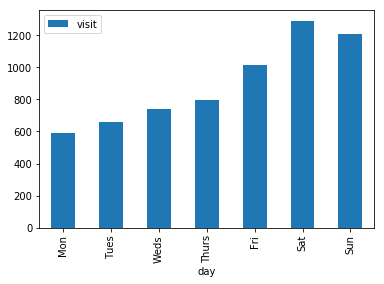

In [10]:
daily_count.groupby('day').mean().plot(kind='bar')
plt.xticks(range(7), ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.show()

Steady increase in traffic as weekend approaches

**Average hourly Plot**

In [11]:
hour_count = logins.resample('H').count()
hour_count['hour'] = hour_count.index.hour
hour_count['day'] = hour_count.index.weekday.map(day_dict)

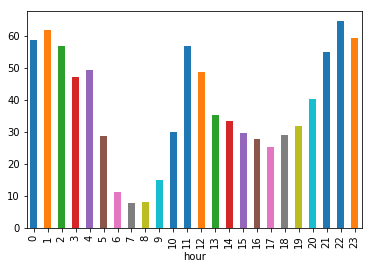

In [12]:
hour_count.groupby('hour').mean()['visit'].plot(kind='bar')
plt.show()

Traffic is highest at noon and late night

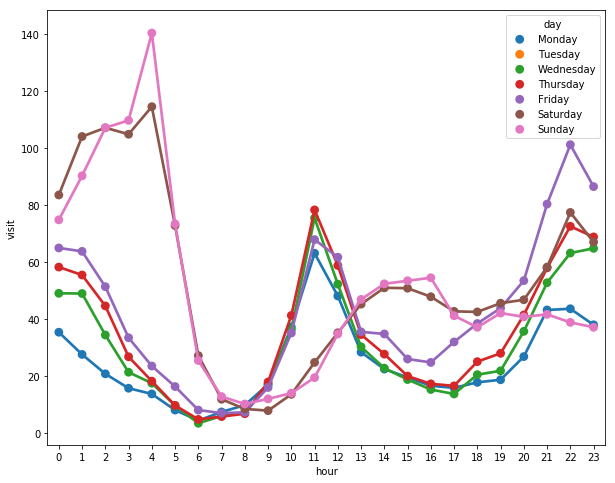

In [13]:
hour_groupby = hour_count.groupby(['hour', 'day']).mean().reset_index()
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.pointplot(data=hour_groupby, x='hour', y='visit', hue='day', hue_order=hue_order, ax=axes)
plt.show()

**Summary**
* Logins are high on Friday, Saturday and Sunday
* There seem to be two kinds of login pattern during the day
* On weekend (Saturday and Sunday), login attempts are higher late night and early morning
* On a weekday, login attempts are high at noon and close midnight

# Part 2- Experiment and Metrics Design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of the
observation
    * how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Metric of Success
The idea behind the city operations reimbursing the toll costs is to encourage driver partners to serve both cities. This should invariably lead to increased number of cabs crossing the toll bridges. The metric to measure the success of this experiment would be the average number of vehicles that cross the toll bridge on every day. 

## Experiment to measure success
Below will be the experiment that would be conducted
* Before introducing any change to the tolls, measure the average number of vehicles that cross the bridge every day for 3 months. This can be measured by the amount of toll collected each day
* Introduce the change - reimbursing all the toll costs 
* Again measure the number of vehicles that cross the bridge every day for another 3 months. This can be measured by the amount of toll collected and reimbursed

Perform A/B testing to determine the success of the proposed experiment. 
* Pick an alpha (significance level = 5%). 
* Use Null Hypothesis H0 = No change in traffic across the bridge
* Alternate Hypothesis Ha = The practical experiment was successful in increasing the traffic across the bridge
* Compute the p-value for Ha assuming H0 was true. 
* If p-value < alpha, Reject H0 and declare that Ha is true. 